In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

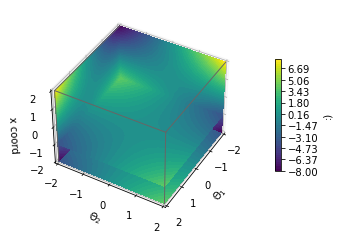

IndexError: index 5 is out of bounds for axis 2 with size 5

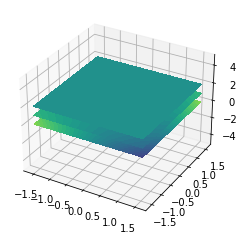

In [14]:
point_num = 20 #Any bigger than 10 and the kernel just dies
test_p1 = np.linspace(-2,2,point_num)
test_p2 = np.linspace(-2,2,point_num)
test_p3 = np.linspace(-2,2,5)
test_p_mesh = np.array(np.meshgrid(test_p1,test_p2,test_p3))

X, Y, Z = test_p_mesh
V = X*-Y*Z

# Create data
point_num = point_num
# data = ei.reshape(point_num,point_num,point_num).T
data = V

kw = {
    'vmin': data.min(),
    'vmax': data.max(),
    'levels': np.linspace(data.min(), data.max()),
}

# Create a figure with 3D ax
fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111, projection='3d')

# Plot contour surfaces
for i in range(2):
    for j in range(2):
        for k in range(2):
            for l in range(2):
                _ = ax.contourf(
                    X[:, :, i], Y[:, :, j], data[:, :, k],
                    zdir='z', offset=Z[0,0,l], **kw, cmap = "viridis"
                ) 

_ = ax.contourf(
    X[0, :, :], data[0, :, :], Z[0, :, :],
    zdir='y', offset=Y[0,0,0], **kw, cmap = "viridis"
)
C = ax.contourf(
    data[:, 0, :], Y[:, 0, :], Z[:, 0, :],
    zdir='x', offset=X[0,0,0], **kw, cmap = "viridis"
)

#     C = ax.contourf(
#         data[:, -1, :], Y[:, -1, :], Z[:, i, :],
#         zdir='x', offset=X[0,-1,0], **kw,cmap = "viridis"
#     )


# Set limits of the plot from coord limits
xmin, xmax = X.min(), X.max()
ymin, ymax = Y.min(), Y.max()
zmin, zmax = Z.min(), Z.max()
ax.set(xlim=[xmin, xmax], ylim=[ymin, ymax], zlim=[zmin, zmax])

# Plot edges
edges_kw = dict(color='0.4', linewidth=1, zorder=1e3)
ax.plot([xmax, xmax], [ymin, ymax], [zmax, zmax], **edges_kw)
ax.plot([xmin, xmax], [ymax, ymax], [zmax, zmax], **edges_kw)
ax.plot([xmax, xmax], [ymin, ymin], [zmin, zmax], **edges_kw)
ax.plot([xmax, xmax], [ymax, ymax], [zmin, zmax], **edges_kw)
ax.plot([xmin, xmax], [ymin, ymin], [zmax, zmax], **edges_kw)

# Set labels and zticks
ax.set(
    xlabel='$\Theta_1$',
    ylabel='$\Theta_2$',
    zlabel='x coord',
)

# Set distance and angle view
ax.view_init(40, 30)
ax.dist = 11

# Colorbar
fig.colorbar(C, ax=ax, fraction=0.02, pad=0.1, label=":)")

# Show Figure
plt.show()

# Plot contour surfaces
shrink = len(Z)/2
for i in range(3):
    # Create a figure with 3D ax
    fig = plt.figure(figsize=(5, 4))
    ax = fig.add_subplot(111, projection='3d')
    for i in range(int(len(Z)/2)):
        up_lim = len(Z) - int(len(Z)/shrink)
        low_lim = int(len(Z)/shrink)
#         print(low_lim,up_lim)
        _ = ax.contourf(
            X[low_lim:up_lim, low_lim:up_lim, i], 
            Y[low_lim:up_lim, low_lim:up_lim, i], 
            data[low_lim:up_lim, low_lim:up_lim, i],
            zdir='z',offset=Z[-1,-1,i+low_lim],  **kw, cmap = "viridis"
        ) 

    # Set limits of the plot from coord limits
    xmin, xmax = test_p1.min(), test_p1.max()
    ymin, ymax = test_p2.min(), test_p2.max()
    zmin, zmax = test_p3.min(), test_p3.max()
    ax.set(xlim=[xmin, xmax], ylim=[ymin, ymax], zlim=[zmin, zmax])

    # Plot edges
    edges_kw = dict(color='0.4', linewidth=1, zorder=1e3)

    # Set labels and zticks
    ax.set(
        xlabel='$\Theta_1$',
        ylabel='$\Theta_2$',
        zlabel='x coord',
    )

    # Set distance and angle view
    ax.view_init(40, 30)
    ax.dist = 11

    # Colorbar
    fig.colorbar(C, ax=ax, fraction=0.02, pad=0.1, label=":)")

    # Show Figure
    plt.show()
    shrink = shrink/1.75